# PyDSTool : An introduction

This Notebook is inspired by : http://www2.gsu.edu/~matrhc/FrontPage.html

The description of PyDSTool is :"With PyDSTool we aim to provide a powerful suite of computational tools for the development, simulation, and analysis of dynamical systems that are used for the modeling of physical processes in many scientific disciplines. "

## Basic Introduction

Using this package there is one important thing to remember : the numerical solvers need to be presented with a system of first order differential equations.
$$ \frac{d y}{d t} = - \frac{kx}{m} $$
$$ \frac{dx}{dt} = y$$

The PyDStool solver will be analog to the one of Matlab in the way we interract with the system.

In [1]:
from PyDSTool import *

First we need to declare a name that we will use for the dictionnary containing initial conditions for two variables. In the same way we need to define a dictionary for all the parameters. This leads to the following code :


In [2]:
icdict = {'x': 1, 'y': 0.4}    # Initial conditions dictonnary
pardict = {'k': 0.1, 'm': 0.5} # Parameters values dictionnary

The next step is to define the vector field of the system. Or in other words the right-hand sides of the differential equation.

In [3]:
x_rhs = 'y'
y_rhs = '-k*x/m'

Those two lines are particular. They assign strings to two names. The strings happen to use name that we have mentioned already and the name we assigned where only to remeber us which string belong to which variables. Now we need to tell which variables are dynamic, with the dynamic of the string that the variable maps to.

In [4]:
vardict = {'x': x_rhs, 'y': y_rhs}

Now we need to construct the full model for PyDSTool. To do this we will need to call the 'args' class of PyDSTool:

In [5]:
DSargs = args()                   # create an empty object instance of the args class, call it DSargs
DSargs.name = 'SHM'               # name our model
DSargs.ics = icdict               # assign the icdict to the ics attribute
DSargs.pars = pardict             # assign the pardict to the pars attribute
DSargs.tdata = [0, 20]            # declare how long we expect to integrate for
DSargs.varspecs = vardict         # assign the vardict dictionary to the 'varspecs' attribute of DSargs

All the details of this class can be found here : http://www.ni.gsu.edu/~rclewley/PyDSTool/UserDocumentation.html
We can change all the values after, but we first to need to initialize in order to call the program. 

Now we need to convert all this specifications into a specific solver. All this kind of generators can be found :
http://www.ni.gsu.edu/~rclewley/PyDSTool/Generators.html
And the following code will be an example 

In [6]:
DS = Generator.Vode_ODEsystem(DSargs)

We can interact in many ways with DS objects. In order to show all the things we can do, we can use the function 'help'. 

In [11]:
help(DS
    )


Help on Vode_ODEsystem in module PyDSTool.Generator.Vode_ODEsystem object:

class Vode_ODEsystem(PyDSTool.Generator.ODEsystem.ODEsystem)
 |  Wrapper for VODE, from SciPy.
 |  
 |  Uses Python target language only for functional specifications.
 |  
 |  Method resolution order:
 |      Vode_ODEsystem
 |      PyDSTool.Generator.ODEsystem.ODEsystem
 |      PyDSTool.Generator.baseclasses.ctsGen
 |      PyDSTool.Generator.baseclasses.Generator
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  AuxVars(self, t, xdict, pdict=None, asarray=True)
 |      asarray is an unused, dummy argument for compatibility with
 |      Model.AuxVars
 |  
 |  Jacobian(self, t, xdict, pdict=None, asarray=True)
 |      asarray is an unused, dummy argument for compatibility with
 |      Model.Jacobian
 |  
 |  JacobianP(self, t, xdict, pdict=None, asarray=True)
 |      asarray is an unused, dummy argument for compatibility with
 |      Model.JacobianP
 |  
 |  Rhs(self, t, xdict, pdict=None, asarray=

If we want to change the parameters of the ODE, we need to be careful and use the already written function. If we change it directly we could mess with the related values of other parameters.

In [12]:
DS.set(pars={'k': 0.3},
           ics={'x': 0.4})

Now we can finally solve the system and obtain a trajectory http://www.ni.gsu.edu/~rclewley/PyDSTool/UserDocumentation.html#head-8bb69b45e39d4947ca78953b7fb61080c864d68a).

In [13]:
traj = DS.compute('demo')
pts = traj.sample()

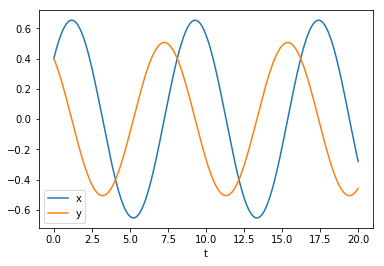

In [14]:
%matplotlib inline
plt.plot(pts['t'], pts['x'], label='x')
plt.plot(pts['t'], pts['y'], label='y')
plt.legend()
plt.xlabel('t')

Just to finish this part, we will see how to run scripts on a DS object it order to measure quantities from the simulation.

In [16]:
def KE(pts):
    return 0.5*DS.pars['m']*pts['y']**2

def PE(pts):
    return 0.5*DS.pars['k']*pts['x']**2

total_energy = KE(pts) + PE(pts)

print (total_energy)

KE(traj(5.4)) # At time 5.4

[ 0.064  0.064  0.064 ...,  0.064  0.064  0.064]


0.0010671506776360137

This code highlights the utility of the 'trajectory' object. We can use this object as a parametric function. Indeed it interpolates between independent variables automatically. In our example $5.4$ was not in the 'time set'.

In [17]:
pts.find(5.4)

(539, 540)

## A bit further : Calcium Channel model

The examples can be found : https://github.com/robclewley/pydstool/tree/master/examples

In this part we will begin to work on bifurcation diagramm for a simple nonlinear model :
$$ C \frac{dV}{dt} = I + g_L (V_L - V) +g_{Ca} m(V) (V_{Ca}-V)$$
where $m(V) = 0.5(1 + \tanh[(V-V_1)/V_2])$

The initialization is as follows :

In [18]:
import PyDSTool as dst # Give a name to the package
import numpy as np
from matplotlib import pyplot as plt

# we must give a name
DSargs = dst.args(name='Calcium channel model')
# parameters
DSargs.pars = { 'vl': -60,
               'vca': 120,
                 'i': 0,
                'gl': 2,
               'gca': 4,
                 'c': 20,
                'v1': -1.2,
                'v2': 18  }
# auxiliary helper function(s) -- function name: ([func signature], definition)
DSargs.fnspecs  = {'minf': (['v'], '0.5 * (1 + tanh( (v-v1)/v2 ))') }
# rhs of the differential equation, including dummy variable w
DSargs.varspecs = {'v': '( i + gl * (vl - v) - gca * minf(v) * (v-vca) )/c',
                   'w': 'v-w' }
# initial conditions
DSargs.ics      = {'v': 0, 'w': 0 }

Like before we use a Generator in order to find the solution of the dynamical system. We can just note that $w$ in the code is jsut a dummy variable necessary to this version of PyDSTool (need two variables).

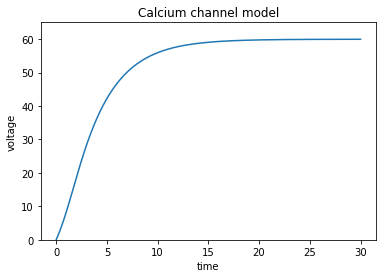

In [19]:
DSargs.tdomain = [0,30]                         # set the range of integration.
ode  = dst.Generator.Vode_ODEsystem(DSargs)     # an instance of the 'Generator' class.
traj = ode.compute('polarization')              # integrate ODE with trajectory name : polarization / use print (traj.info(1)) to obtian the info
pts  = traj.sample(dt=0.1)                      # Data for plotting

# PyPlot commands
plt.plot(pts['t'], pts['v'])
plt.xlabel('time')                              # Axes labels
plt.ylabel('voltage')                           # ...
plt.ylim([0,65])                                # Range of the y axis
plt.title(ode.name)                             # Figure title from model name
plt.show()


The equation we used is bistable. One way to highlight this is with the following code :


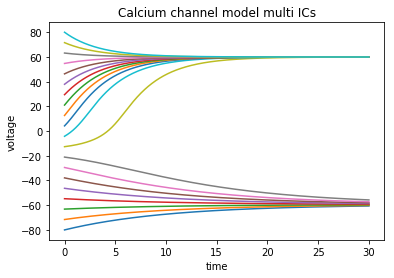

In [26]:
plt.clf()                                       # Clear the figure

for i, v0 in enumerate(np.linspace(-80,80,20)):
    ode.set( ics = { 'v': v0 } )                # Initial condition
    # Trajectories are called pol0, pol1, ...
    # sample them on the fly to create Pointset tmp
    tmp = ode.compute('pol%3i' % i).sample()    # or specify dt option to sample to sub-sample
    plt.plot(tmp['t'], tmp['v'])
plt.xlabel('time')
plt.ylabel('voltage')
plt.title(ode.name + ' multi ICs')
plt.show()

We will now be interested in the bifurcation diagram and the nonlinear study, that are the main point of this package.

To do so we need to work with a ContClass (http://www2.gsu.edu/~matrhc/PyCont.html). It allows tools for numerical continuation for solutions to initial value problems and level curves of nonlinear function. It also detects bifurcation points. To obtain all the specifities check the link.


In [27]:

# Prepare the system to start close to a steady state
ode.set(pars = {'i': -220} )       # Lower bound of the control parameter 'i'
ode.set(ics =  {'v': -170} )       # Close to one of the steady states present for i=-220

PC = dst.ContClass(ode)            # Set up continuation class

PCargs = dst.args(name='EQ1', type='EP-C')     # 'EP-C' stands for Equilibrium Point Curve. The branch will be labeled 'EQ1'.
PCargs.freepars     = ['i']                    # control parameter(s) (it should be among those specified in DSargs.pars)
PCargs.MaxNumPoints = 450                      # The following 3 parameters are set after trial-and-error
PCargs.MaxStepSize  = 2
PCargs.MinStepSize  = 1e-5
PCargs.StepSize     = 2e-2
PCargs.LocBifPoints = 'LP'                     # detect limit points / saddle-node bifurcations
PCargs.SaveEigen    = True                     # to tell unstable from stable branches

The 'LocBifPoints' attributes tells PyCont what type of bifurcation should be tracked. In this example, because we now the result we specify that only saddle-node bifurcation should be detected. We can then compute this diagram :

LP Point found 
LP Point found 


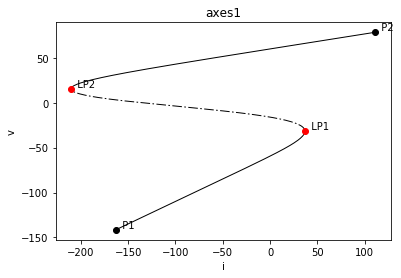

In [28]:
PC.newCurve(PCargs)
PC['EQ1'].forward()                                    # Forward because we look for t>0
PC.display(['i','v'], stability=True, figure=3)        # stable and unstable branches as solid and dashed curves, resp.

PC['EQ1'] now consists of a "struct" data type that specifies the particular equilibrium curve we prepared the system for. The information of the equilibrium curve can be accessed via the 'info()' method. We can obtain detailed information about a particular special point calling the 'getSpecialPoint' method.

If we want to know the location of the limit points as we vary the calcium condutance : 

CP Point found 


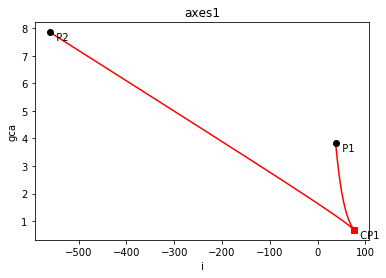

In [29]:
PCargs = dst.args(name='SN1', type='LP-C')
PCargs.initpoint    = 'EQ1:LP2'
PCargs.freepars     = ['i', 'gca']
PCargs.MaxStepSize  = 2
PCargs.LocBifPoints = ['CP']
PCargs.MaxNumPoints = 200
PC.newCurve(PCargs)
PC['SN1'].forward()
PC['SN1'].backward()
PC['SN1'].display(['i','gca'], figure=4)